In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import welch, stft, butter, lfilter, sosfilt
from scipy.optimize import curve_fit

In [11]:
def peak_func(x, amp, omega_0, gamma):
    """A Lorentzian line shape"""
    return amp * gamma / ( ( omega_0**2 - x**2)**2 + gamma**2 * x**2 )

def fit_peak(x, y, peak_func, p0=None):
    popt, pcov = curve_fit(peak_func, x, y, p0=p0)
    
    # Return central frequency and gamma
    return popt, x, peak_func(x, *popt)

## 10 seconds of data, no driving field

In [2]:
data_file = r"C:\Users\yuhan\Documents\Data\calibration\20240304_noefield_1e-7mbar_xyz.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

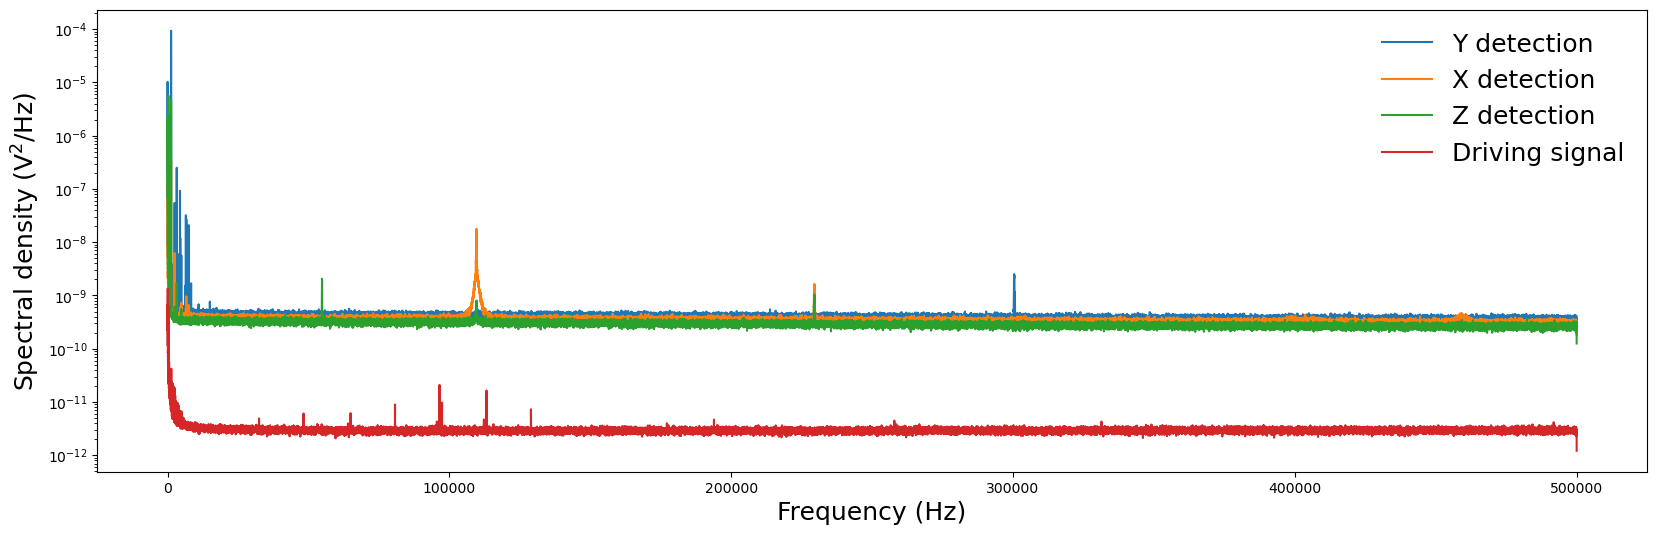

In [7]:
fs = int(np.ceil(1 / (data[0, 1] - data[0, 0])))

fig, ax = plt.subplots(figsize = (20, 6))
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)', fontsize=18)
ax.set_ylabel('Spectral density (V$^2$/Hz)', fontsize=18)

for i in range(1, 5):
    f, p = welch(data[i], fs=fs, nperseg=fs/10)
    
    if i==1:      label = 'Y detection'
    elif i == 2:  label = 'X detection'
    elif i == 3:  label = 'Z detection'
    else:         label = 'Driving signal'
    ax.plot(f, p, label=f'{label}')
    
ax.legend(frameon=False, fontsize=18)

Low Pressure - Amplitude: 139077.3065561639, central frequency: 54804.06415941408 Hz, gamma: 108.34392256344337 Hz


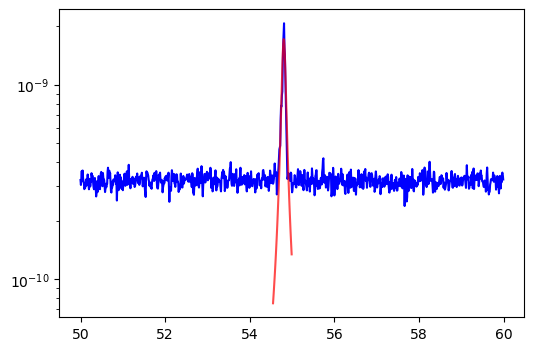

In [18]:
ffz, ppz = welch(data[3], fs=fs, nperseg=fs/10)

lb, ub = 5000, 6000
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ffz[lb:ub]/1000, ppz[lb:ub], 'b', label='Z detection')
ax.set_yscale('log')

# Fit with a Lorentzian and plot
lb_fit, ub_fit = 5455, 5500
popt, omega_fit, p_fit = fit_peak(ffz[lb_fit:ub_fit]*2*np.pi, ppz[lb_fit:ub_fit], peak_func, p0=[5e6, 54500*2*np.pi, 500])
amp_low, omega0_low, gamma_low = popt[0], popt[1], popt[2]
print(f'Low Pressure - Amplitude: {amp_low}, central frequency: {omega0_low/(2*np.pi)} Hz, gamma: {gamma_low/(2*np.pi)} Hz')

ax.plot(omega_fit/(2*np.pi)/1000, p_fit, 'r', alpha=0.7)

## Transfer function measurement over time